# Train/Test RMSE/R2 for Interpolation vs Extrapolation

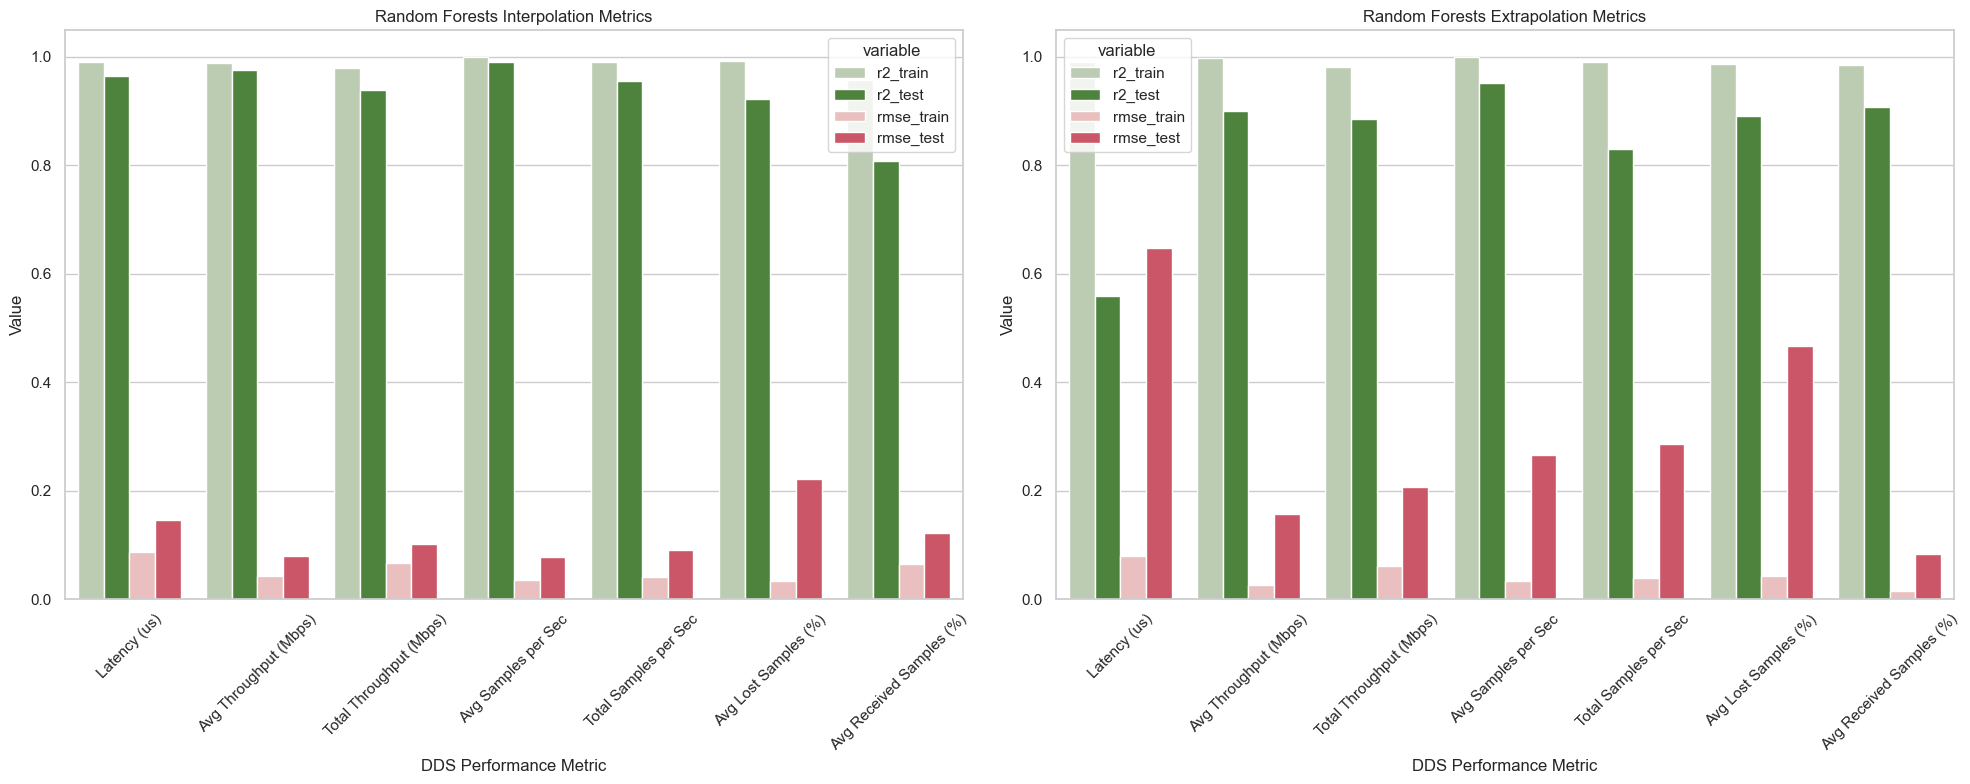

In [103]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
import os

warnings.filterwarnings('ignore', category=FutureWarning)

interpolation_df = pd.read_csv(os.path.join('best_interpolation_models_rf_models.csv'))
extrapolation_df = pd.read_csv(os.path.join('best_extrapolation_models_rf_models.csv'))

metrics_of_interest = [
    'latency_us', 
    'avg_throughput_mbps',
    'total_throughput_mbps',
    'avg_samples_per_sec',
    'total_samples_per_sec',
    'avg_lost_samples_percentage',
    'avg_received_samples_percentage',    
]

interpolation_df = interpolation_df[interpolation_df['metric'].isin(metrics_of_interest)]
extrapolation_df = extrapolation_df[extrapolation_df['metric'].isin(metrics_of_interest)]

# ? Order the metrics in the same order as the metrics_of_interest
interpolation_df['metric'] = pd.Categorical(interpolation_df['metric'], categories=metrics_of_interest, ordered=True)
extrapolation_df['metric'] = pd.Categorical(extrapolation_df['metric'], categories=metrics_of_interest, ordered=True)

# ? Rename the metrics to be more readable
interpolation_df['metric'] = interpolation_df['metric'].replace({
    'latency_us': 'Latency (us)',
    'avg_throughput_mbps': 'Avg Throughput (Mbps)',
    'total_throughput_mbps': 'Total Throughput (Mbps)',
    'avg_samples_per_sec': 'Avg Samples per Sec',
    'total_samples_per_sec': 'Total Samples per Sec',
    'avg_lost_samples_percentage': 'Avg Lost Samples (%)',
    'avg_received_samples_percentage': 'Avg Received Samples (%)',
})
extrapolation_df['metric'] = extrapolation_df['metric'].replace({
    'latency_us': 'Latency (us)',
    'avg_throughput_mbps': 'Avg Throughput (Mbps)',
    'total_throughput_mbps': 'Total Throughput (Mbps)',
    'avg_samples_per_sec': 'Avg Samples per Sec',
    'total_samples_per_sec': 'Total Samples per Sec',
    'avg_lost_samples_percentage': 'Avg Lost Samples (%)',
    'avg_received_samples_percentage': 'Avg Received Samples (%)',
})

sns.set_context("paper")
sns.set(style="whitegrid")

def plot_grouped_bar(df1, df2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    palette = {
        'r2_train': '#bad0af',
        'r2_test': '#488f31',
        'rmse_train': '#f0b8b8',
        'rmse_test': '#de425b',
    }

    sns.barplot(x='metric', y='value', hue='variable', data=df1, ax=axes[0], palette=palette)
    sns.barplot(x='metric', y='value', hue='variable', data=df2, ax=axes[1], palette=palette)
    
    axes[0].set_title(title1)
    axes[1].set_title(title2)
    
    axes[0].set_ylabel('Value')
    axes[1].set_ylabel('Value')

    axes[0].set_xlabel('DDS Performance Metric')
    axes[1].set_xlabel('DDS Performance Metric')

    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

interp_melted = interpolation_df.melt(id_vars=['metric'], value_vars=['r2_train', 'r2_test', 'rmse_train', 'rmse_test'])
extrap_melted = extrapolation_df.melt(id_vars=['metric'], value_vars=['r2_train', 'r2_test', 'rmse_train', 'rmse_test'])

plot_grouped_bar(interp_melted, extrap_melted, 'Random Forests Interpolation Metrics', 'Random Forests Extrapolation Metrics')

# % difference in r2 test and rmse test for interpolation vs extrapolation

## Linear Regression

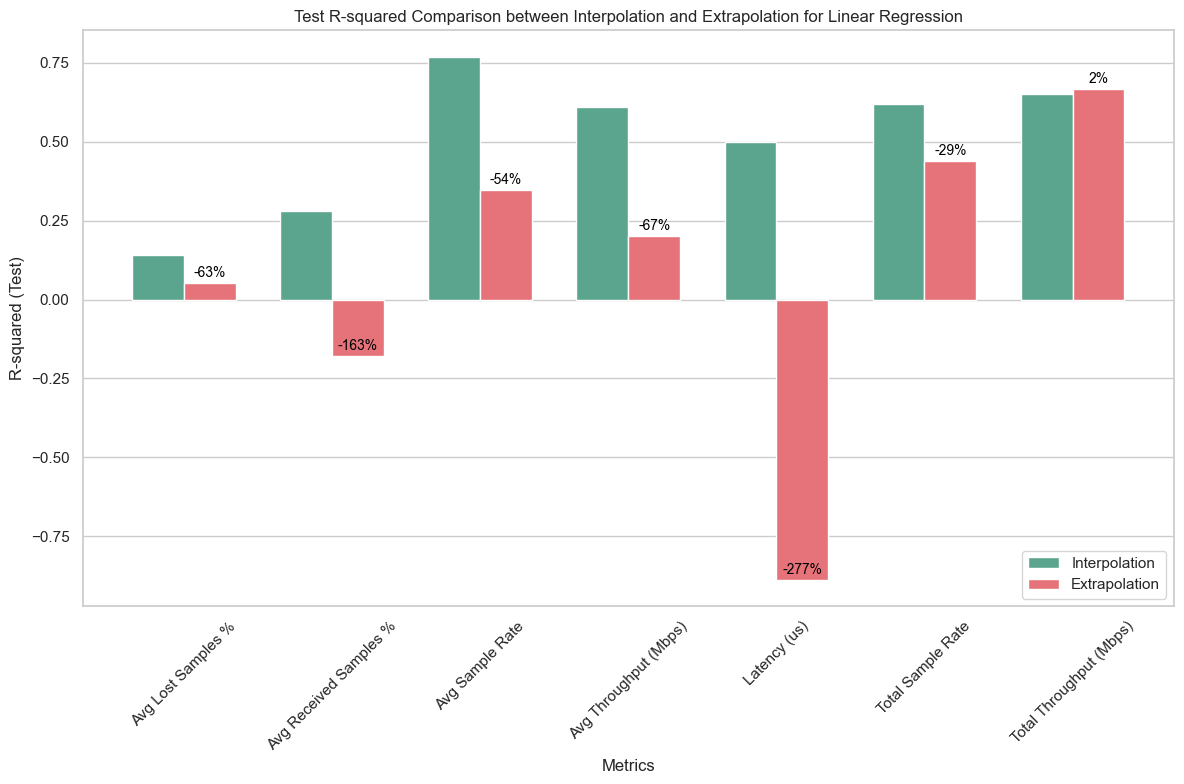

In [84]:
df = pd.read_csv("best_lr_models_focused_metrics.csv")

# Filter data for interpolation and extrapolation types separately
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have your data in a DataFrame called 'df'

# Filter data for interpolation and extrapolation types separately
interpolation_data = df[df['type'] == 'interpolation']
extrapolation_data = df[df['type'] == 'extrapolation']

# List of unique metrics in the dataset
metrics = df['metric'].unique()
metric_titles = [metric.replace('_', ' ').replace("percentage", "%").title().replace("Us", "(us)").replace("Mbps", "(Mbps)").replace("s Per Sec", " Rate") for metric in metrics]

# Create a list to store R-squared values for each metric and type
r2_interpolation_values = []
r2_extrapolation_values = []

for metric in metrics:
    # Extract R-squared values for the current metric and type
    r2_interpolation = interpolation_data[interpolation_data['metric'] == metric]['r2_test'].values[0]
    r2_extrapolation = extrapolation_data[extrapolation_data['metric'] == metric]['r2_test'].values[0]
    
    # Append the values to the lists
    r2_interpolation_values.append(r2_interpolation)
    r2_extrapolation_values.append(r2_extrapolation)

# Calculate the percentage difference between Interpolation and Extrapolation
percentage_differences = [(r2_ext - r2_int) / r2_int * 100 for r2_int, r2_ext in zip(r2_interpolation_values, r2_extrapolation_values)]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(metrics))

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
bar1 = plt.bar(index, r2_interpolation_values, bar_width, label='Interpolation', color='#5ba58f')
bar2 = plt.bar(index + bar_width, r2_extrapolation_values, bar_width, label='Extrapolation', color='#e67379')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('R-squared (Test)')
plt.title('Test R-squared Comparison between Interpolation and Extrapolation for Linear Regression')
plt.xticks(index + bar_width / 2, metric_titles, rotation=45, ha='center')
plt.legend(loc='lower right')
plt.grid(axis='x')

# Add percentage difference on top of Extrapolation bars
for i, val in enumerate(percentage_differences):
    plt.text(index[i] + bar_width, r2_extrapolation_values[i] + 0.01, f'{int(val)}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## Random Forests

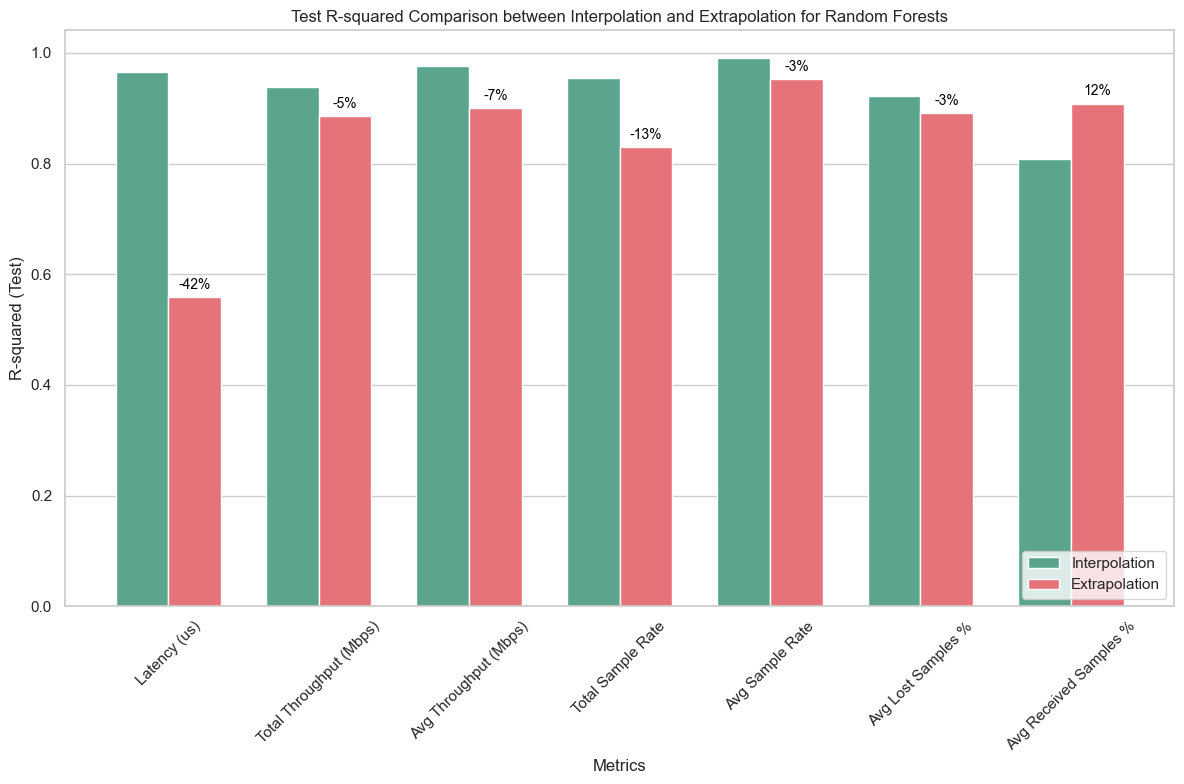

In [92]:
df = pd.read_csv("best_rf_models_focused_metrics.csv")

# Filter data for interpolation and extrapolation types separately
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have your data in a DataFrame called 'df'

# Filter data for interpolation and extrapolation types separately
interpolation_data = df[df['type'] == 'interpolation']
extrapolation_data = df[df['type'] == 'extrapolation']

# List of unique metrics in the dataset
metrics = df['metric'].unique()
metric_titles = [metric.replace('_', ' ').replace("percentage", "%").title().replace("Us", "(us)").replace("Mbps", "(Mbps)").replace("s Per Sec", " Rate") for metric in metrics]

# Create a list to store R-squared values for each metric and type
r2_interpolation_values = []
r2_extrapolation_values = []

for metric in metrics:
    # Extract R-squared values for the current metric and type
    r2_interpolation = interpolation_data[interpolation_data['metric'] == metric]['r2_test'].values[0]
    r2_extrapolation = extrapolation_data[extrapolation_data['metric'] == metric]['r2_test'].values[0]
    
    # Append the values to the lists
    r2_interpolation_values.append(r2_interpolation)
    r2_extrapolation_values.append(r2_extrapolation)

# Calculate the percentage difference between Interpolation and Extrapolation
percentage_differences = [(r2_ext - r2_int) / r2_int * 100 for r2_int, r2_ext in zip(r2_interpolation_values, r2_extrapolation_values)]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(metrics))

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
bar1 = plt.bar(index, r2_interpolation_values, bar_width, label='Interpolation', color='#5ba58f')
bar2 = plt.bar(index + bar_width, r2_extrapolation_values, bar_width, label='Extrapolation', color='#e67379')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('R-squared (Test)')
plt.title('Test R-squared Comparison between Interpolation and Extrapolation for Random Forests')
plt.xticks(index + bar_width / 2, metric_titles, rotation=45, ha='center')
plt.legend(loc='lower right')
plt.grid(axis='x')

# Add percentage difference on top of Extrapolation bars
for i, val in enumerate(percentage_differences):
    plt.text(index[i] + bar_width, r2_extrapolation_values[i] + 0.01, f'{int(val)}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()